# Data Cleaning, Pre-Processing, Exploration

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import cluster, metrics, decomposition
from sklearn.preprocessing import LabelEncoder

In [104]:
student_mat = pd.read_csv("student-mat.csv")
student_por = pd.read_csv("student-por.csv")

df1 = pd.DataFrame(student_mat)
df2 = pd.DataFrame(student_por)

In [105]:
df1['classroom'] = 'mat'
df2['classroom'] = 'por'

df = pd.concat([df1, df2])
df=df.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,classroom
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,5,4,1,4,1,0,8,0,0,por
611,MS,F,18,R,GT3,T,2,2,services,other,...,2,1,1,1,4,5,14,14,15,por
618,MS,F,18,R,LE3,A,1,2,at_home,other,...,3,4,1,4,5,0,16,15,15,por
632,MS,F,19,R,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,7,8,9,por


Combined Portuegues class and Math classes together and dropped duplicate data

In [106]:

df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['paid'] = df['paid'].map({'yes': 1, 'no': 0})
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['Pstatus'] = df['Pstatus'].map({'T': 1, 'A': 0})
df['address'] = df['address'].map({'U': 1, 'R': 0})
df['famsize'] = df['famsize'].map({'LE3': 1, 'GT3': 0})
df['classroom'] = df['classroom'].map({'mat': 1, 'por': 0})
lb_make = LabelEncoder()
df["Mjob"] = lb_make.fit_transform(df["Mjob"])
df["Fjob"] = lb_make.fit_transform(df["Fjob"])
df["reason"] = lb_make.fit_transform(df["reason"])
df["guardian"] = lb_make.fit_transform(df["guardian"])

All binary values changed to 1's or 0's 

In [107]:
#Descriptive Stats
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,classroom
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,...,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,0.655589,0.410876,16.812689,0.696375,0.303625,0.874622,2.492447,2.293051,1.930514,2.208459,...,3.184290,3.172205,1.504532,2.282477,3.531722,4.930514,10.728097,10.708459,10.725076,0.590634
std,0.475535,0.492365,1.269194,0.460170,0.460170,0.331397,1.130958,1.094027,1.249995,0.872537,...,1.060583,1.161907,0.926567,1.290121,1.434835,6.858060,3.082098,3.529588,4.106738,0.492089
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,8.000000,9.000000,9.000000,0.000000
50%,1.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.000000,11.000000,11.000000,1.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [108]:
#Change all object types to category types
cols = ['school', 'sex', 'address', 'famsize','Pstatus', 'Mjob','Fjob','reason','guardian','schoolsup',
        'famsup','paid','activities','nursery','higher','internet','romantic','classroom']
df[cols] = df[cols].astype('category')

In [109]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 642
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      662 non-null    category
 1   sex         662 non-null    category
 2   age         662 non-null    int64   
 3   address     662 non-null    category
 4   famsize     662 non-null    category
 5   Pstatus     662 non-null    category
 6   Medu        662 non-null    int64   
 7   Fedu        662 non-null    int64   
 8   Mjob        662 non-null    category
 9   Fjob        662 non-null    category
 10  reason      662 non-null    category
 11  guardian    662 non-null    category
 12  traveltime  662 non-null    int64   
 13  studytime   662 non-null    int64   
 14  failures    662 non-null    int64   
 15  schoolsup   662 non-null    category
 16  famsup      662 non-null    category
 17  paid        662 non-null    category
 18  activities  662 non-null    category
 19  nursery 

No missing values

In [110]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.119031,-0.133645,0.014530,0.001454,0.280021,-0.008453,-0.002414,0.094744,0.130655,0.069320,-0.013347,0.168313,-0.113206,-0.130408,-0.127446
Medu,-0.119031,1.000000,0.635156,-0.239830,0.104501,-0.163166,0.010211,-0.011450,0.022866,-0.018013,-0.036381,-0.002183,0.095703,0.208172,0.202776,0.182611
Fedu,-0.133645,0.635156,1.000000,-0.189146,0.045236,-0.170862,0.016171,0.009450,0.053071,-0.008774,0.032370,0.038402,0.068048,0.185636,0.156541,0.137159
traveltime,0.014530,-0.239830,-0.189146,1.000000,-0.066172,0.078820,-0.010459,-0.007536,0.039607,0.084199,0.060548,-0.045230,-0.049896,-0.071572,-0.111347,-0.073488
studytime,0.001454,0.104501,0.045236,-0.066172,1.000000,-0.125250,0.003935,-0.077845,-0.078264,-0.139678,-0.220301,-0.054130,-0.039015,0.172011,0.133655,0.097863
failures,0.280021,-0.163166,-0.170862,0.078820,-0.125250,1.000000,-0.068134,0.114463,0.060217,0.088939,0.084924,0.035372,0.087584,-0.368938,-0.360881,-0.359377
famrel,-0.008453,0.010211,0.016171,-0.010459,0.003935,-0.068134,1.000000,0.140165,0.091317,-0.069881,-0.092647,0.109476,-0.067647,0.060893,0.052807,0.061296
freetime,-0.002414,-0.011450,0.009450,-0.007536,-0.077845,0.114463,0.140165,1.000000,0.332688,0.117690,0.127746,0.088609,-0.042332,-0.040185,-0.061199,-0.058860
goout,0.094744,0.022866,0.053071,0.039607,-0.078264,0.060217,0.091317,0.332688,1.000000,0.252217,0.404503,0.002163,0.025046,-0.093786,-0.091030,-0.081691
Dalc,0.130655,-0.018013,-0.008774,0.084199,-0.139678,0.088939,-0.069881,0.117690,0.252217,1.000000,0.618431,0.065323,0.125517,-0.112935,-0.084944,-0.075212


We notice high (greater than 0.5) correlation between the following:
    - Fedu and Medu at 0.642063
    - Walc and Dalc at 0.627814
    - G1 and G2 at 0.858739
    - G1 and G3 at 0.809142
    - G2 and G3 at 0.910743
This indicated that these attributes can be reduced

In [111]:
df['Dalc'] = df.Dalc.astype(int)
df['Walc'] = df.Walc.astype(int)

sum_column = (df["Dalc"] + df["Walc"])/2
df["Alc"] = sum_column

del df['Dalc']
del df['Walc']

In [112]:
df['Avg_Grade'] = (df['G1'] + df['G2'] + df['G3']) / 3
df = df.drop(['G1','G2','G3'], axis=1)

In [113]:
df['Pedu'] = (df['Fedu'] + df['Medu'])/2
df = df.drop(['Fedu', 'Medu'], axis = 1)

In [114]:
df.cov()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,Alc,Avg_Grade,Pedu
age,1.610852,0.013698,0.001527,0.254476,-0.010106,-0.003250,0.139718,-0.024306,1.465028,0.133577,-0.563771,-0.178213
traveltime,0.013698,0.551750,-0.040669,0.041921,-0.007317,-0.005937,0.034183,-0.048206,-0.254179,0.057987,-0.226652,-0.177592
studytime,0.001527,-0.040669,0.684599,-0.074203,0.003067,-0.068312,-0.075241,-0.064262,-0.221385,-0.171122,0.387170,0.069368
failures,0.254476,0.041921,-0.074203,0.512690,-0.045953,0.086923,0.050098,0.036341,0.430086,0.068728,-0.927665,-0.132988
famrel,-0.010106,-0.007317,0.003067,-0.045953,0.887233,0.140024,0.099940,0.147959,-0.436988,-0.086787,0.196484,0.013771
freetime,-0.003250,-0.005937,-0.068312,0.086923,0.140024,1.124836,0.409971,0.134841,-0.307901,0.145223,-0.205607,-0.001385
goout,0.139718,0.034183,-0.075241,0.050098,0.099940,0.409971,1.350028,0.003606,0.199579,0.438942,-0.366327,0.048754
health,-0.024306,-0.048206,-0.064262,0.036341,0.147959,0.134841,0.003606,2.058750,-0.392649,0.153535,-0.222337,0.028370
absences,1.465028,-0.254179,-0.221385,0.430086,-0.436988,-0.307901,0.199579,-0.392649,47.032986,0.978973,-0.746125,0.626424
Alc,0.133577,0.057987,-0.171122,0.068728,-0.086787,0.145223,0.438942,0.153535,0.978973,1.000366,-0.387597,-0.008791


C:\Users\louie.DESKTOP-C1CTRTD\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\louie.DESKTOP-C1CTRTD\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


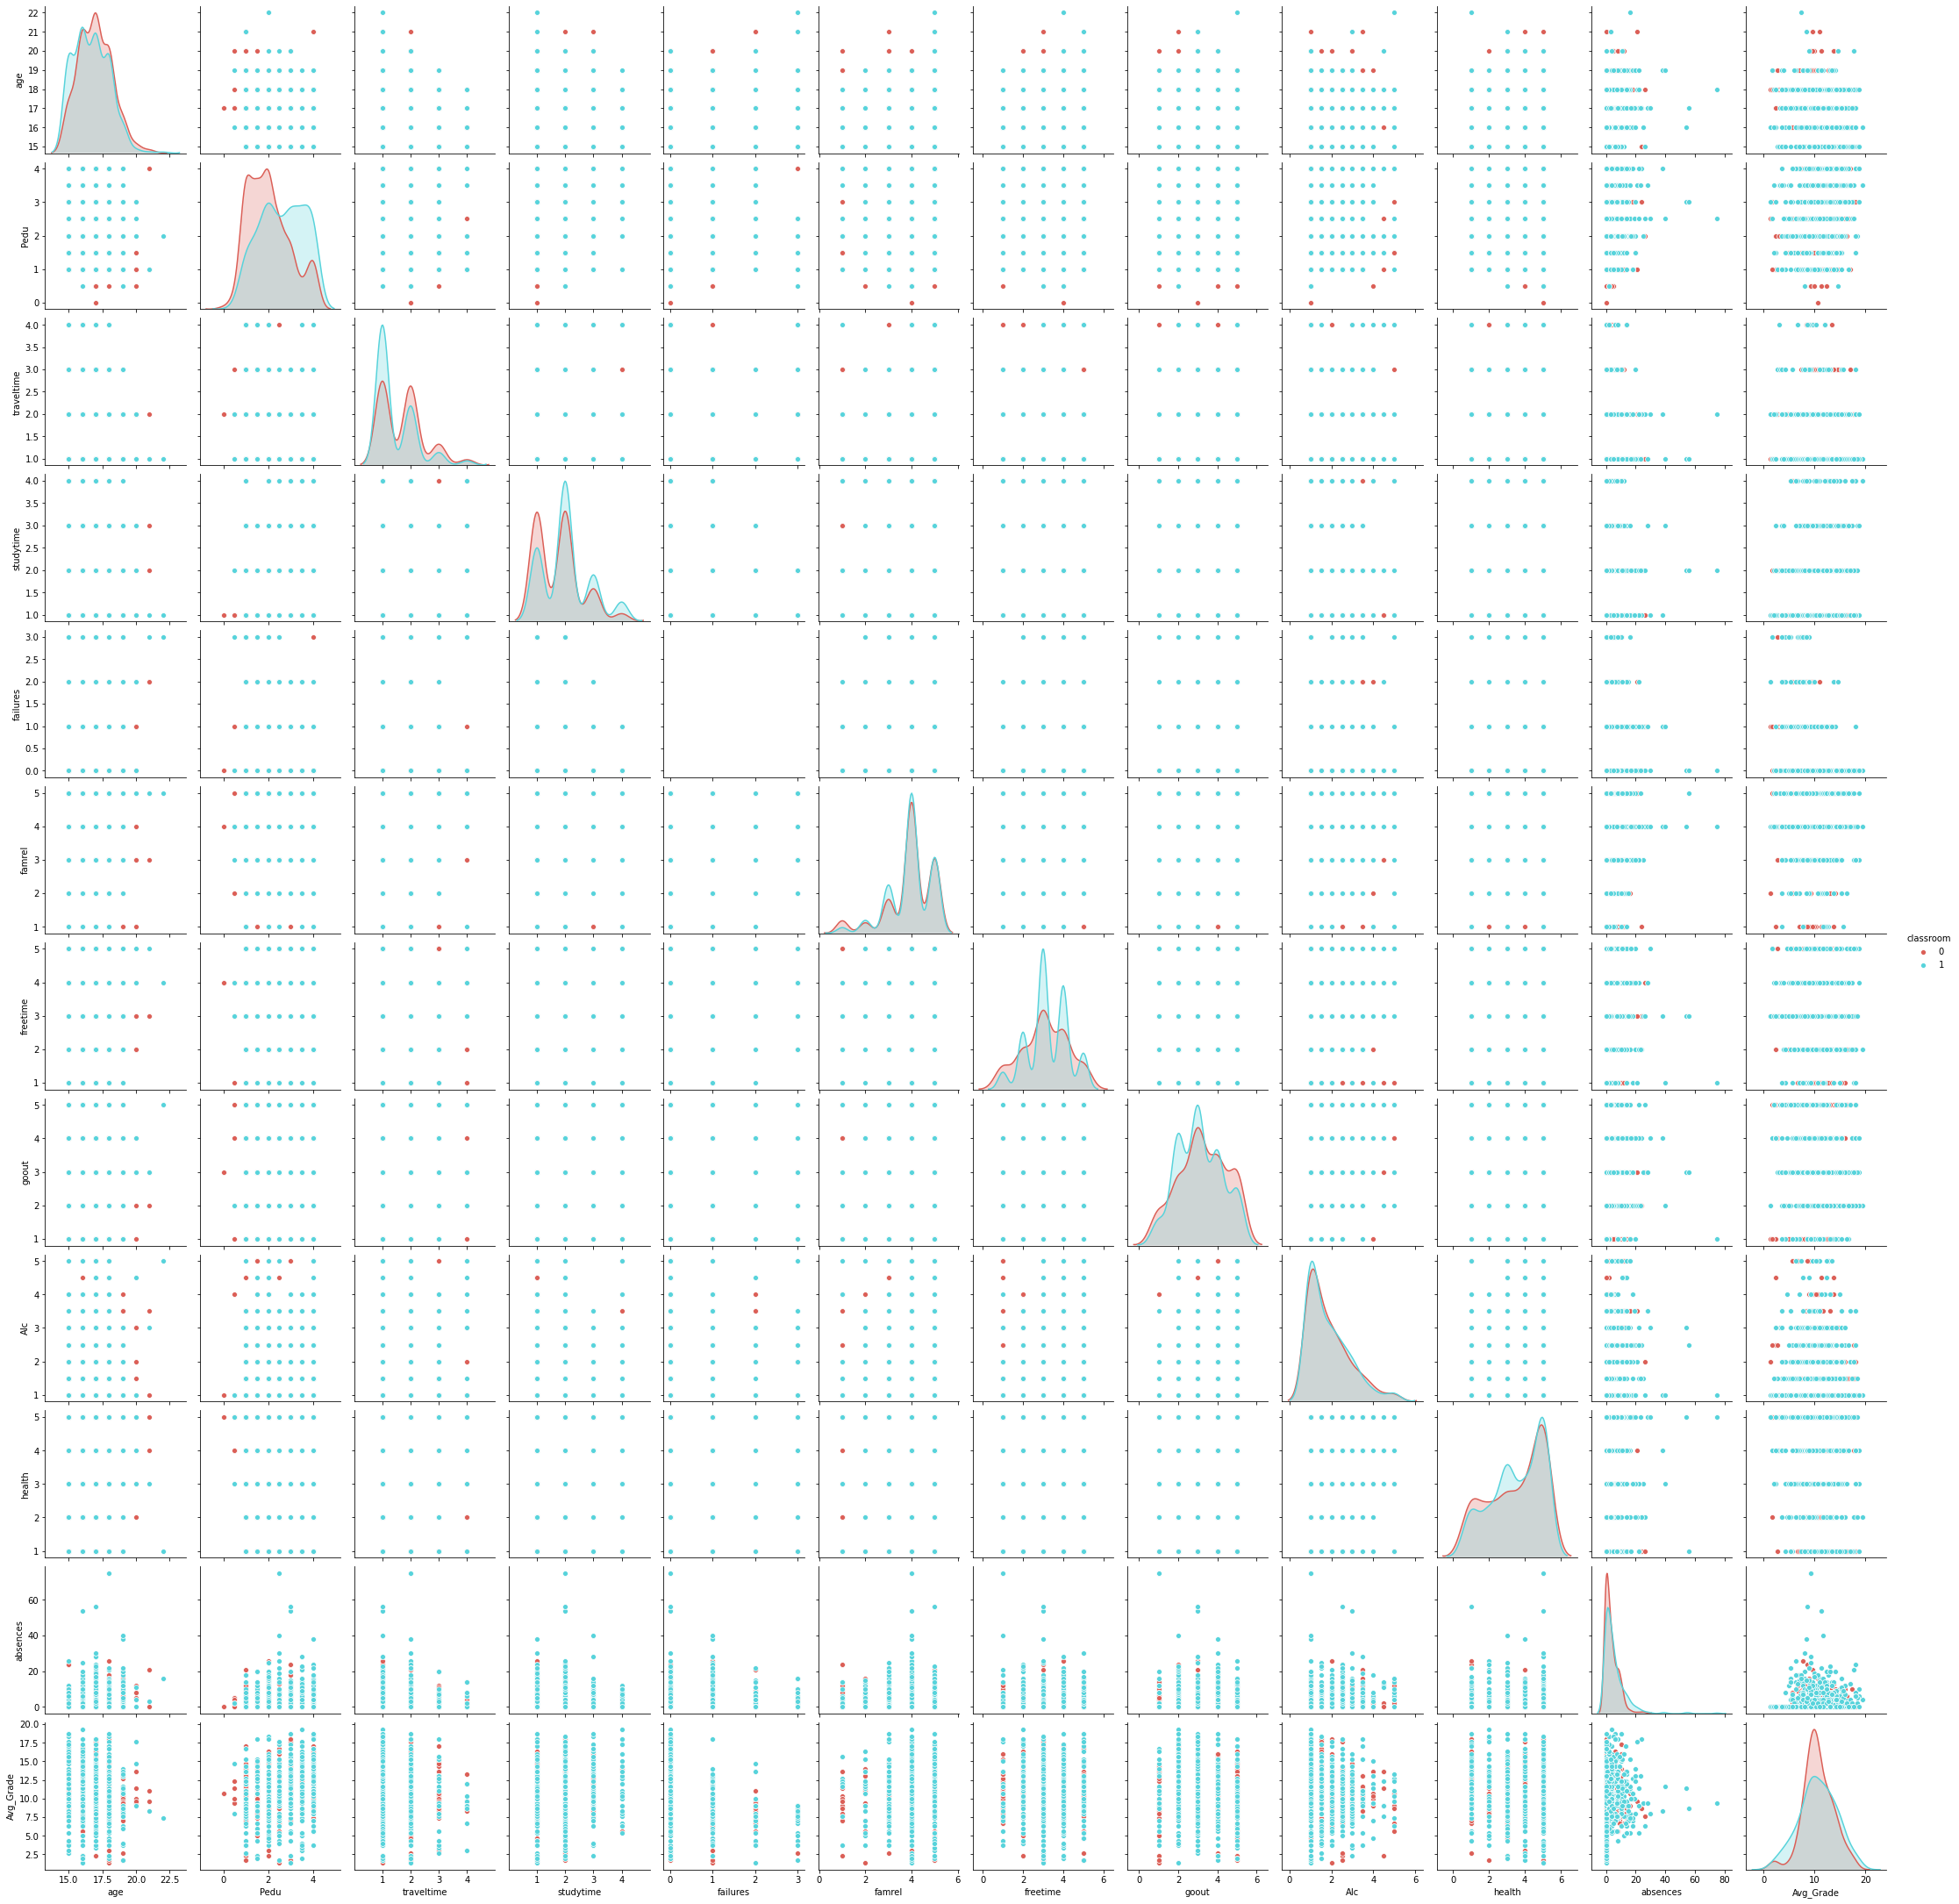

In [115]:
#Scatterplot of data based on class taken (Math or Porteguese)

sb.pairplot(df, hue='classroom', palette='hls', vars = ['age','Pedu','traveltime','studytime','failures','famrel','freetime','goout','Alc','health','absences','Avg_Grade'])

In [116]:
df["grade"] = np.zeros(len(df["Avg_Grade"]))
df

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,health,absences,classroom,Alc,Avg_Grade,Pedu,grade
0,1,0,18,1,0,0,0,4,0,1,...,4,3,4,3,6,1,1.0,5.666667,4.0,0.0
1,1,0,17,1,0,1,0,2,0,0,...,5,3,3,3,4,1,1.0,5.333333,1.0,0.0
2,1,0,15,1,1,1,0,2,2,1,...,4,3,2,3,10,1,2.5,8.333333,1.0,0.0
3,1,0,15,1,0,1,1,3,1,1,...,3,2,2,5,2,1,1.0,14.666667,3.0,0.0
4,1,0,16,1,0,1,2,2,1,0,...,4,3,2,5,4,1,1.5,8.666667,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,0,19,0,0,0,0,0,0,2,...,3,5,4,1,0,0,2.5,2.666667,1.0,0.0
611,0,0,18,0,0,1,3,2,1,1,...,4,2,1,4,5,0,1.0,14.333333,2.0,0.0
618,0,0,18,0,1,0,0,2,0,1,...,4,3,4,5,0,0,2.5,15.333333,1.5,0.0
632,0,0,19,0,0,1,0,2,0,2,...,4,3,3,3,4,0,1.0,8.000000,1.0,0.0


In [117]:
df["grade"] = np.zeros(len(df["Avg_Grade"]))
df["grade"] = np.where((df["Avg_Grade"] >= 1) & (df["Avg_Grade"] < 5), '1', df["grade"])
df["grade"] = np.where((df["Avg_Grade"] >= 5) & (df["Avg_Grade"] < 9), '2', df["grade"])
df["grade"] = np.where((df["Avg_Grade"] >= 9) & (df["Avg_Grade"] < 13), '3', df["grade"])
df["grade"] = np.where((df["Avg_Grade"] >= 13) & (df["Avg_Grade"] < 17), '4', df["grade"])
df["grade"] = np.where((df["Avg_Grade"] >= 17) & (df["Avg_Grade"] < 21), '5', df["grade"])

# 1 = F
# 2 = D
# 3 = C
# 4 = B
# 5 = A

# Project

# 2) Class Distribution in Random Subsampling

In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison

data = np.array(df)

In [120]:
df1 = pd.DataFrame(df, columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'classroom', 'Alc', 'Pedu'])

In [121]:
df2 = df["grade"]

In [122]:
data = np.array(df1)
data2 = np.array(df2, dtype='int64')
np.unique(data2)

array([1, 2, 3, 4, 5], dtype=int64)

In [123]:
data = [data, data2]


In [124]:
X, y = data

In [125]:
X, y = shuffle_arrays_unison([X, y], random_seed=123)
X_train, X_test = X[:430], X[430:642]
y_train, y_test = y[:430], y[430:642]

In [126]:
np.bincount(y)

array([  0,  33, 136, 315, 153,  25], dtype=int64)

In [127]:
np.bincount(y_train)

array([  0,  22,  79, 214, 102,  13], dtype=int64)

In [128]:
np.bincount(y_test)

array([ 0, 11, 53, 93, 45, 10], dtype=int64)

In [129]:
df = pd.DataFrame(X)
df['class'] = y
df_train = pd.DataFrame(X_train)
df_train['class'] = y_train
df_test = pd.DataFrame(X_test)
df_test['class'] = y_test


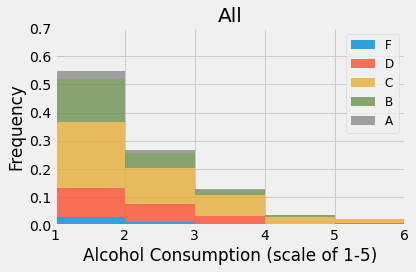

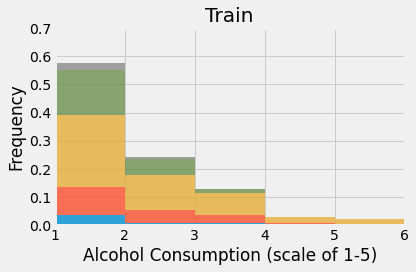

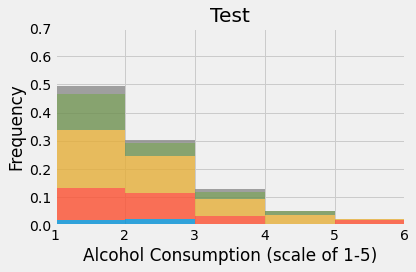

In [130]:
def stackhist(x, y, **kws):
    grouped = x.groupby(y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data,
    histtype="barstacked",
    label=labels,
    alpha=0.8,
    density=True,
    bins=np.arange(0,7, 1))
    plt.ylim([0, .7])
    plt.xlim([1, 6])
    plt.xlabel('Alcohol Consumption (scale of 1-5)')
    plt.ylabel('Frequency')
with plt.style.context('fivethirtyeight'):
    stackhist(df[27], df['class'])
    plt.legend(['F', 'D', 'C', 'B', 'A'], fontsize=12)
    plt.title('All')
    plt.tight_layout()
    #plt.savefig('./all.svg')
    plt.show()
    stackhist(df_train[27], df_train['class'])
    plt.title('Train')
    plt.tight_layout()
    #plt.savefig('./train.svg')
    plt.show()
    stackhist(df_test[27], df_test['class'])
    plt.title('Test')
    plt.tight_layout()
    #plt.savefig('./test.svg')
    plt.show()

#  Holdout method and repeated sampling

In [131]:
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = data
clf_1 = KNeighborsClassifier(n_neighbors=3,
                            weights='uniform',
                            algorithm='kd_tree',
                            leaf_size=30,
                            p=2,
                            metric='minkowski',
                            metric_params=None,
                            n_jobs=1)


Average: 38.24%


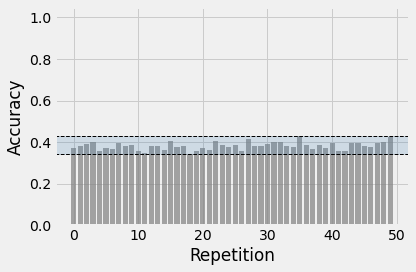

In [132]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]
pred_2 = []
4
for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.5,
    random_state=i,
    stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)

pred_2 = np.asarray(pred_2)
print('Average: %.2f%%' % (pred_2.mean()*100))
with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1.05])
    plt.tight_layout()
    
    plt.show()


Average: 38.75%


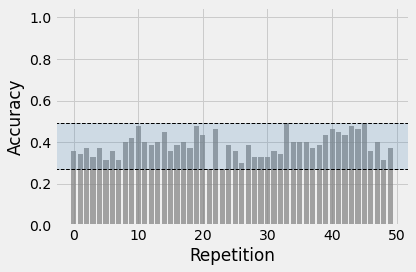

In [133]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]
pred_2 = []
for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.1,
    random_state=i,
    stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)
pred_2 = np.asarray(pred_2)
print('Average: %.2f%%' % (pred_2.mean()*100))
with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    6
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.05)
    plt.tight_layout()
    
    plt.show()


# Pessimistic Bias Holdout

In [134]:
X2, y2 = data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
test_size=0.3,
random_state=12,
stratify=y2)
print('Number of train examples:', y_train2.shape[0])
print('Number of test examples:', y_test2.shape[0])
print('Labels:', y_train2)

Number of train examples: 463
Number of test examples: 199
Labels: [4 2 2 2 3 2 1 3 3 1 1 4 2 3 3 2 4 4 2 4 3 4 3 3 3 4 3 4 4 3 3 2 2 3 4 4 3
 3 4 2 3 2 2 2 3 3 4 3 3 3 4 4 3 2 3 3 1 3 1 3 4 3 3 3 3 5 4 3 4 3 4 3 3 4
 3 3 3 4 1 3 1 2 2 3 3 3 4 4 2 3 3 4 4 1 4 2 3 4 3 4 3 2 3 3 4 3 3 4 4 3 4
 3 1 3 4 4 2 3 3 4 2 3 3 3 4 3 3 3 3 4 4 2 4 4 3 2 2 2 3 1 3 3 2 2 2 2 3 2
 2 4 3 3 3 3 4 2 2 5 4 4 3 3 3 3 2 4 3 4 3 3 3 3 3 4 3 3 3 5 4 3 2 4 4 3 3
 1 2 3 1 2 4 3 3 3 2 4 3 2 2 5 2 3 4 2 3 2 3 4 4 3 3 4 4 3 4 3 3 3 3 4 4 3
 4 3 1 3 2 2 2 2 3 3 3 2 3 4 3 3 2 4 2 3 3 5 3 4 3 2 3 4 2 3 2 4 3 3 3 4 4
 3 1 4 3 3 3 2 5 5 4 3 3 3 3 5 4 4 2 3 4 4 3 2 3 3 3 4 3 3 3 2 3 1 4 3 2 5
 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 4 3 3 4 4 3 3 2 4 3 3 3 1 2 4 3 3 4 3 4 2 3
 3 3 3 3 1 4 3 2 3 4 3 4 2 1 3 3 3 4 3 2 5 2 2 1 2 3 5 5 5 1 3 2 3 3 3 3 3
 1 3 3 4 4 2 2 3 4 3 2 2 3 3 2 3 3 4 2 2 3 3 3 4 2 1 3 4 3 3 4 2 3 3 4 2 2
 2 3 3 3 2 3 4 3 4 1 4 4 3 3 4 3 2 4 4 4 3 3 3 2 2 2 2 2 2 3 4 3 4 3 3 5 5
 3 3 2 2 4 3 5 2 3 3 2 5 5 3 3 3 

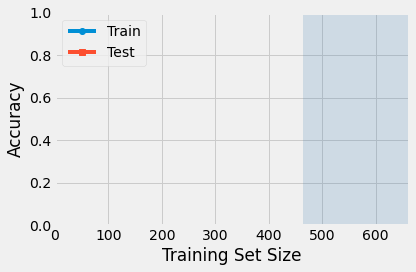

In [135]:
from sklearn.linear_model import LogisticRegression
clf_2 = LogisticRegression(penalty='l2',
                            dual=False,
                            tol=0.0001,
                            C=0.000001,
                            fit_intercept=True,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=12,
                            solver='lbfgs',
                            max_iter=1000,
                            multi_class='multinomial',
                            verbose=0,
                            warm_start=False,
                            n_jobs=1)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)
    
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([0, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0],
    X_train2.shape[0] + X_test2.shape[0],
    alpha=0.2,
    color='steelblue')
    plt.ylim([0, 1])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    

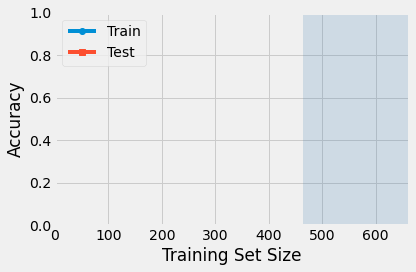

In [136]:
from sklearn.ensemble import RandomForestClassifier

clf_2 = RandomForestClassifier(n_estimators=100, random_state=123)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)
    
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([0, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0],
                X_train2.shape[0] + X_test2.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0, 1])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()

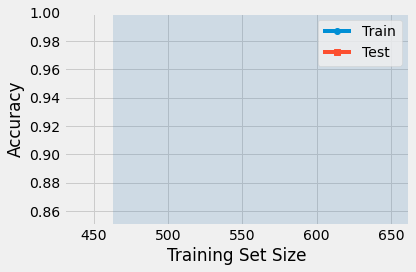

In [137]:
from sklearn.neighbors import KNeighborsClassifier

clf_2 = KNeighborsClassifier(n_neighbors=3)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)

with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0],
                X_train2.shape[0] + X_test2.shape[0],
                alpha=0.2,
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()


# Bootstrapping

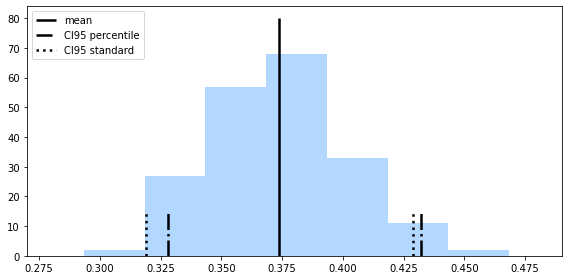

In [138]:
from sklearn.neighbors import KNeighborsClassifier
rng = np.random.RandomState(seed=12345)

X, y = data

clf = KNeighborsClassifier(n_neighbors=3,
                            weights='uniform',
                            algorithm='kd_tree',
                            leaf_size=30,
                            p=2,
                            metric='minkowski',
                            metric_params=None,
                            n_jobs=1)

idx = np.arange(y.shape[0])
accuracies = []

for i in range(200):
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_test_X, boot_test_y = X[test_idx], y[test_idx]
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

mean = np.mean(accuracies)
#se = np.sqrt( (1. / (100-1)) * np.sum([(acc - mean)**2 for acc in␣,→accuracies]))
#ci = 1.984 * se
se = np.sqrt( (1. / (200-1)) * np.sum([(acc - mean)**2 for acc in accuracies]))
ci = 1.97 * se
lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)
fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(mean, [0], 80, lw=2.5, linestyle='-', label='mean')
#ax.vlines(med, [0], 60, lw=2.5, linestyle='--', label='median')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label='CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')
ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label='CI95 standard')

ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')
ax.hist(accuracies, bins=7,
        color='#0080ff', edgecolor="none",
        alpha=0.3)
plt.legend(loc='upper left')
plt.xlim([.27, .49])
plt.tight_layout()
#plt.savefig('figures/bootstrap-histo-1.svg')
plt.show()


# 5k MNIST Subset

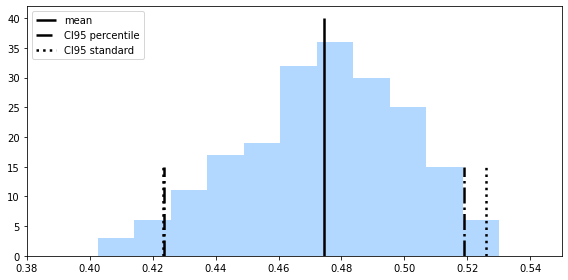

In [139]:
from sklearn.linear_model import LogisticRegression
rng = np.random.RandomState(seed=12345)
X, y = data
clf = LogisticRegression(penalty='l2',
                        dual=False,
                        tol=0.0001,
                        C=0.000001,
                        fit_intercept=True,
                        intercept_scaling=1,
                        class_weight=None,
                        random_state=12,
                        solver='lbfgs',
                        max_iter=1000,
                        multi_class='multinomial',
                        verbose=0,
                        warm_start=False,
                        n_jobs=1)

idx = np.arange(y.shape[0])
accuracies = []
for i in range(200):
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_test_X, boot_test_y = X[test_idx], y[test_idx]
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

mean = np.mean(accuracies)
#se = np.sqrt( (1. / (100-1)) * np.sum([(acc - mean)**2 for acc in␣,→accuracies]))
#ci = 1.984 * se
se = np.sqrt( (1. / (200-1)) * np.sum([(acc - mean)**2 for acc in accuracies]))
ci = 1.97 * se
lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)
fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(mean, [0], 40, lw=2.5, linestyle='-', label='mean')
#ax.vlines(med, [0], 60, lw=2.5, linestyle='--', label='median')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label='CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')
ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label='CI95 standard')
ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')
ax.hist(accuracies, bins=11,
        color='#0080ff', edgecolor="none",
        alpha=0.3)
plt.legend(loc='upper left')
plt.xlim([0.38, 0.55])
plt.tight_layout()
# plt.savefig('figures/bootstrap-histo-2.svg')
plt.show()


# Out of Bag Bootstrap

In [140]:
from mlxtend.evaluate import BootstrapOutOfBag
import numpy as np
oob = BootstrapOutOfBag(n_splits=3)
for train, test in oob.split(np.array([1, 2, 3, 4, 5])):
    print(train, test)


[3 3 3 4 0] [1 2]
[1 0 3 1 1] [2 4]
[4 0 4 2 3] [1]


In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
X, y = data
model = DecisionTreeClassifier()


In [142]:
cv_scores = cross_val_score(model, X, y, cv=5)
print('CV scores', cv_scores)
print('Mean CV score', np.mean(cv_scores))
print('CV score Std', np.std(cv_scores))


CV scores [0.39097744 0.2556391  0.36363636 0.32575758 0.34848485]
Mean CV score 0.33689906584643425
CV score Std 0.045827720020169584


In [143]:
bootstrap_scores = \
cross_val_score(model, X, y,
                cv=BootstrapOutOfBag(n_splits=5, random_seed=456))
print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))


Bootstrap scores [0.34817814 0.375      0.36681223 0.36625514 0.37238494]
Mean Bootstrap score 0.3657260891994946
Score Std 0.009378015533804606


In [144]:
bootstrap_scores = \
cross_val_score(model, X, y,
                cv=BootstrapOutOfBag(n_splits=200, random_seed=456))
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))


Mean Bootstrap score 0.37527691965477616
Score Std 0.029615022001402147


In [145]:
lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [31.78, 43.89]


# .632 Bootstrap

In [146]:
from mlxtend.evaluate import bootstrap_point632_score
bootstrap_scores = bootstrap_point632_score(model, X, y, n_splits=200)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))


Mean Bootstrap score 0.6062819283290658
Score Std 0.019558004185120836


In [147]:
lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [57.35, 64.74]
